In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from utils import *

Create dummy data

In [70]:
# initiate value for computing simulations
np.random.seed(0)

iterations = 6
expo = np.arange(iterations)
Ns = 100 * 10 ** expo

vector_w = np.array(range(101))[1:]

mu = 0
std = .5
b = 1

In [71]:
# make empty n-dimensional arrays for storing the data
X = np.empty(iterations, dtype=object)
error_term = np.empty(iterations, dtype=object)

Y1 = np.empty(iterations, dtype=object)
Y2 = np.empty(iterations, dtype=object)
Y3 = np.empty(iterations, dtype=object)
Y4 = np.empty(iterations, dtype=object)

Ymethod1 = np.empty(iterations, dtype=object)
Ymethod2 = np.empty(iterations, dtype=object)
Ymethod3 = np.empty(iterations, dtype=object)
Ymethod4 = np.empty(iterations, dtype=object)

# make data simulation
for i in range(iterations):
    X[i] = np.tile(np.random.normal(0, 0.5, (len(vector_w), Ns[i])), (1, 1))
    error_term[i] = np.random.normal(0,.5,Ns[i])
    # simulate target Y
    Y1[i] = make_dummy_y_unvectorized1(X[i], vector_w, b, error_term[i])
    Y2[i] = make_dummy_y_unvectorized2(X[i], vector_w, b, error_term[i])
    Y3[i] = make_dummy_y_vectorized1(X[i], vector_w, b, error_term[i])
    Y4[i] = make_dummy_y_vectorized2(X[i], vector_w, b, error_term[i])
    # make measurement for execution time
    Ymethod1[i] = measure_execution_time(make_dummy_y_unvectorized1, X[i], vector_w, b, error_term[i])
    Ymethod2[i] = measure_execution_time(make_dummy_y_unvectorized2, X[i], vector_w, b, error_term[i])    
    Ymethod3[i] = measure_execution_time(make_dummy_y_vectorized1, X[i], vector_w, b, error_term[i])
    Ymethod4[i] = measure_execution_time(make_dummy_y_vectorized2, X[i], vector_w, b, error_term[i])

In [72]:
print(Ymethod1)
print(Ymethod2)
print(Ymethod3)
print(Ymethod4)

[0.0092 0.039 0.399 3.7788 37.2259 381.569]
[0.0044 0.0537 0.5197 5.1665 51.0666 521.568]
[0.001 0.003 0.027 0.2738 2.7665 29.1594]
[0.0 0.001 0.0014 0.003 0.045 0.4754]


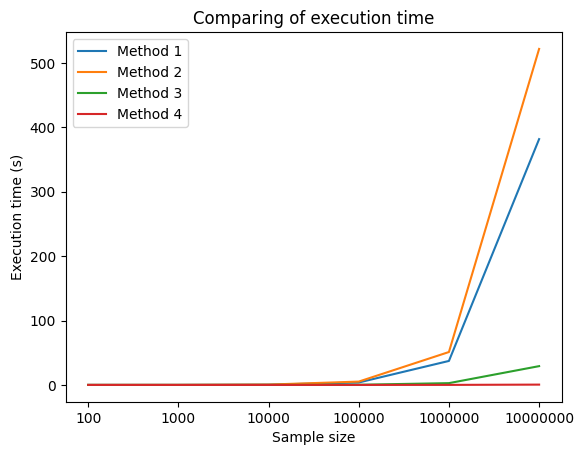

In [73]:
plt.plot(range(iterations), Ymethod1, label = "Method 1")
plt.plot(range(iterations), Ymethod2, label = "Method 2")
plt.plot(range(iterations), Ymethod3, label = "Method 3")
plt.plot(range(iterations), Ymethod4, label = "Method 4")
plt.xticks(range(len(Ns)), Ns)
plt.xlabel("Sample size")
plt.ylabel("Execution time (s)")
plt.title("Comparing of execution time")
plt.legend()
plt.show()

In [1]:
i = 5
print(np.allclose(Y1[i], Y2[i]))
print(np.allclose(Y2[i], Y3[i]))
print(np.allclose(Y3[i], Y4[i]))

NameError: name 'np' is not defined

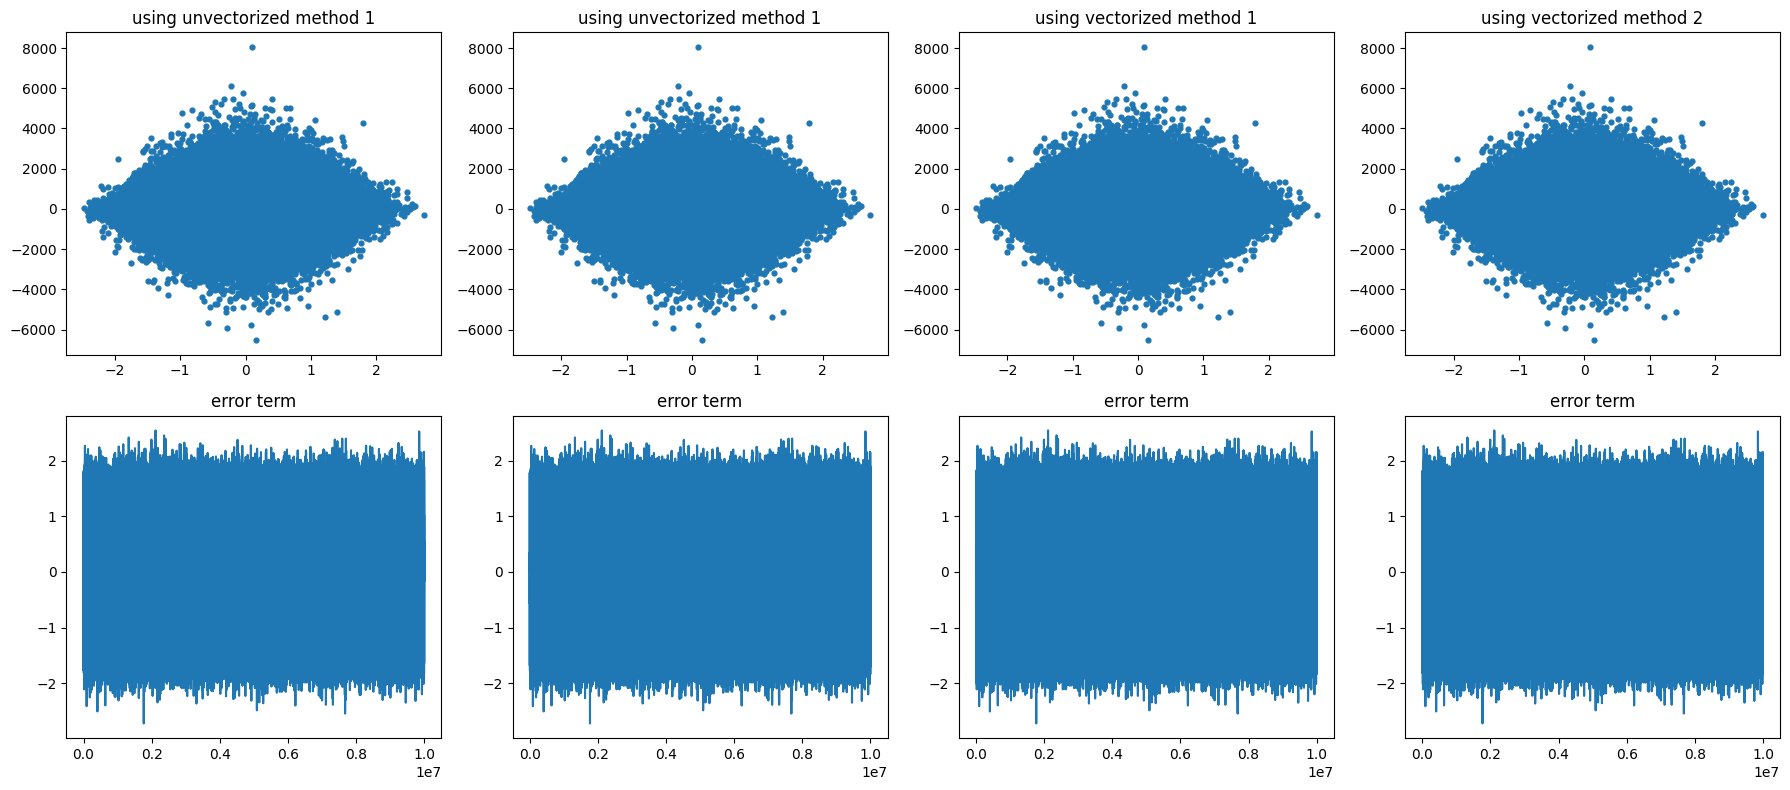

In [88]:
# Plot the data
fig, axs = plt.subplots(2, 4, figsize=(18, 8))
fontsize = 12
markersize = 12
axs[0,0].scatter(X[i][0,:],Y1[i], s=markersize)
axs[1,0].plot(range(X[i][0,:].shape[0]), error_term[i])
axs[0,0].set_title('using unvectorized method 1', fontsize = fontsize)
axs[1,0].set_title('error term', fontsize = fontsize)

axs[0,1].scatter(X[i][0,:],Y2[i], s=markersize)
axs[1,1].plot(range(X[i][0,:].shape[0]), error_term[i])
axs[0,1].set_title('using unvectorized method 1', fontsize = fontsize)
axs[1,1].set_title('error term', fontsize = fontsize)

axs[0,2].scatter(X[i][0,:],Y3[i], s=markersize)
axs[1,2].plot(range(X[i][0,:].shape[0]), error_term[i])
axs[0,2].set_title('using vectorized method 1', fontsize = fontsize)
axs[1,2].set_title('error term', fontsize = fontsize)

axs[0,3].scatter(X[i][0,:],Y4[i],s=markersize)
axs[1,3].plot(range(X[i][0,:].shape[0]), error_term[i])
axs[0,3].set_title('using vectorized method 2', fontsize = fontsize)
axs[1,3].set_title('error term', fontsize = fontsize)

plt.tight_layout()
plt.show()